In [2]:
import tensorflow as tf
import numpy as np

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [4]:
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [7]:
I0 = tf.keras.layers.Dense(units=1,input_shape=[1])

c:\Users\tgunda976\Desktop\Daily_Tasks\Project\Tensorflow\tvenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [8]:
model =tf.keras.Sequential([I0])

Alternate way

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=[1])
])

c:\Users\tgunda976\Desktop\Daily_Tasks\Project\Tensorflow\tvenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Before training, the model has to be compiled. When compiled for training, the model is given:

Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

Optimizer function — A way of adjusting internal values in order to reduce the loss.

In [10]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['mean_absolute_error'])

These are used during training (model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

In [11]:
history = model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [13]:
print(history)

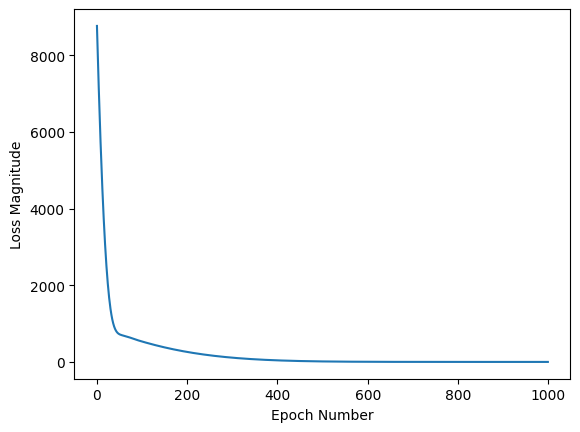

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [15]:
history.history['loss']

[8769.4931640625,
 8348.0,
 7938.23193359375,
 7540.375,
 7154.6103515625,
 6781.09375,
 6419.9580078125,
 6071.32275390625,
 5735.27685546875,
 5411.8896484375,
 5101.2041015625,
 4803.23974609375,
 4517.9873046875,
 4245.4111328125,
 3985.44873046875,
 3738.00927734375,
 3502.974365234375,
 3280.19775390625,
 3069.506591796875,
 2870.700927734375,
 2683.552734375,
 2507.810791015625,
 2343.197509765625,
 2189.41357421875,
 2046.13671875,
 1913.025146484375,
 1789.718017578125,
 1675.8385009765625,
 1570.994140625,
 1474.7813720703125,
 1386.7852783203125,
 1306.5838623046875,
 1233.7489013671875,
 1167.849609375,
 1108.45458984375,
 1055.1336669921875,
 1007.4611206054688,
 965.0171508789062,
 927.3905029296875,
 894.1805419921875,
 864.9986572265625,
 839.4705200195312,
 817.2369995117188,
 797.9561767578125,
 781.3037109375,
 766.9743041992188,
 754.6822509765625,
 744.1611328125,
 735.1656494140625,
 727.4699096679688,
 720.8683471679688,
 715.1751708984375,
 710.2232055664062,
 7

In [21]:
# Convert the list to a NumPy array
input_data = np.array([100.0])


print(model.predict(input_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[211.73972]]


In [23]:
print("These are the layer variables: {}".format(I0.get_weights()))

These are the layer variables: [array([[-1.5966488]], dtype=float32), array([0.], dtype=float32)]


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,input_shape=[1]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=1),
])

c:\Users\tgunda976\Desktop\Daily_Tasks\Project\Tensorflow\tvenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['mean_absolute_error'])

In [27]:
model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)          

In [28]:
print(model.predict(input_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[211.74744]]


By now you should know what the following terms are:

Feature: The input(s) to our model
Examples: An input/output pair used for training
Labels: The output of the model
Layer: A collection of nodes connected together within a neural network.
Model: The representation of your neural network
Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.
Weights and biases: The internal variables of model
Loss: The discrepancy between the desired output and the actual output
MSE: Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.
Gradient Descent: An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.
Optimizer: A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)
Learning rate: The “step size” for loss improvement during gradient descent.
Batch: The set of examples used during training of the neural network
Epoch: A full pass over the entire training dataset
Forward pass: The computation of output values from input
Backward pass (backpropagation): The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.